# Laboratoire 2 : Arbre de désision, Bayes naïf et KNN
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | NOMS - CODE PERMANENT                                   |
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | SAISON ANNÉE                                            |
| Groupe                | X                                                       |
| Numéro du laboratoire | X                                                       |
| Professeur            | Prof. NOM                                               |
| Chargé de laboratoire | NOM                                                     |
| Date                  | DATE                                                    |

In [6]:
import numpy as np
from custom.lab02.matrix import Matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
galaxy = Matrix("data/csv/galaxy/galaxy_feature_vectors.csv")
spam = Matrix("data/csv/spam/spam.csv")

galaxy.ParseFile()
spam.ParseFile()

spamWord = spam.getPrimitive()
train, valid  = spam.CreateTestSet(spamWord, 20)

In [10]:
X = []
Y = []
trainX = []
trainY = []

for line in valid:
    X.append(line[:-1])
    Y.append(line[-1])
    
for line in train:
    trainX.append(line[:-1])
    trainY.append(line[-1])
    
X = np.array(X)
Y = np.array(Y)

#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X, Y)
y_gnb = gnb.predict(trainX)

#Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X, Y)
y_mnb = mnb.predict(trainX)

##MinMax Scaler
mms = MinMaxScaler()
X_minmax = mms.fit_transform(X)
train_minmax = mms.fit_transform(trainX)
mnb.fit(X_minmax,Y)
y_mms = mnb.predict(train_minmax)

##Dicrestisation non-superviser
kbd = KBinsDiscretizer()
X_KBD = kbd.fit_transform(X)
train_KBD = kbd.fit_transform(trainX)
mnb.fit(X_KBD,Y)
y_kbd = mnb.predict(train_KBD)


asgnb, f1gnb = spam.PrintMetricsScore(trainY, y_gnb, "Gaussian")
asmnb, f1mnb = spam.PrintMetricsScore(trainY, y_mnb, "Multinomial")
asmms, f1mms = spam.PrintMetricsScore(trainY, y_mms, "MinMax Scaler")
askbd, f1kbd = spam.PrintMetricsScore(trainY, y_kbd, "Non-Supeerviser")

Gaussian scores: Accuracy: 0.7862318840579711 ; F1: 0.7917221860311056
Multinomial scores: Accuracy: 0.8768115942028986 ; F1: 0.8783423116496374
MinMax Scaler scores: Accuracy: 0.9293478260869565 ; F1: 0.9301230706319968
Non-Supeerviser scores: Accuracy: 0.7681159420289855 ; F1: 0.7735609927829606


In [12]:
from sklearn import tree

# first array for the classification containing the samples and the features of said samples
X = [train[56],train]

# second array for decision tree classifier
Y = ["spam","non-spam"]

X = []
Y = []
trainX = []
trainY = []

for line in valid:
    X.append(line[:-1])
    Y.append(line[-1])
    
for line in train:
    trainX.append(line[:-1])
    trainY.append(line[-1])
    
X = np.array(X)
Y = np.array(Y)

dlc = tree.DecisionTreeClassifier()
dlc = dlc.fit(X,Y)

spams = 0
notSpams = 0

trueSpams = 0
trueNotSpams = 0

# we then use the fitted model to predict the results of the valid array and count the amount in each category
for entry in valid:
    # we predict the entry value
    result = dlc.predict(entry)

    if(results == "spam"):
        spams += 1
    else:
        notSpams += 1

for entry in valid:
    if(valid[56] == "spam"):
        trueSpams += 1      
    else:
        trueNotSpams += 1
        
        
# calculating the spam ratio        
spamRatio = spam/(spams + notSpams)

# calculating the true spam ratio
trueSpamRatio = trueSpams/(trueSpams + trueNotSpams)

ValueError: Expected 2D array, got 1D array instead:
array=[  0.      1.17    0.      0.      0.      0.      0.      0.      1.17
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      0.      0.      0.      0.      0.      1.17    2.35
   0.      0.      0.      0.      0.      0.      0.      0.      0.
   1.17    0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.      1.17    0.376   0.      0.      0.      0.      0.
   2.925  16.    117.      0.   ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
# cross validation
# since the current algo uses data randomly picked from the primitives
# file, we need to recreate the whole thing.(we want set primitive sets)

def CreateCVTestSet(self, dataset, nbOfSets, setToTest):
    setSize = int(self.filelength / nbOfSets)
    
    k = int(setSize * setToTest)
    
    # we set the valid set and training set
    validSet = dataset[k:k+setSize+1]
    trainSet = dataset[0:k+1] + dataset[k+setSize+1:self.filelength]
    
    return trainSet, validSet
    
    

In [14]:
# cross validation in action
counter = 0

totalAScore = 0;
totalf1 = 0

while(counter < 10):
    # we get the trainSet and validationSet for the current set to test
    train, valid  = spam.CreateCVTestSet(spamWord, 10, counter)
    
    # we do the algorithm
    X = []
    Y = []
    trainX = []
    trainY = []

    for line in valid:
        X.append(line[:-1])
        Y.append(line[-1])

    for line in train:
        trainX.append(line[:-1])
        trainY.append(line[-1])

    X = np.array(X)
    Y = np.array(Y)

    mnb = MultinomialNB()

    ##MinMax Scaler
    mms = MinMaxScaler()
    X_minmax = mms.fit_transform(X)
    train_minmax = mms.fit_transform(trainX)
    mnb.fit(X_minmax,Y)
    y_mms = mnb.predict(train_minmax)
    
    
    # we get the median of the sum of the 10 sets
    ascore = accuracy_score(trainY, y_mms)
    f1 = f1_score(trainY, y_mms, average='weighted')
    
    totalAScore += ascore
    totalf1 += f1
    
    counter += 1
    
totalAScore = totalAScore/10
totalf1 += totalf1/10

# print graph
spam.PrintPlot(totalAScore, totalf1, ['Gauss', 'Multinomial', 'MinMax', 'Discrete'], "Bayes Naif")

AttributeError: 'Matrix' object has no attribute 'CreateCVTestSet'

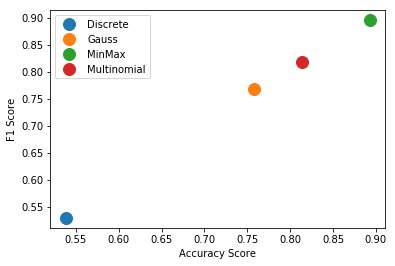

In [6]:
#Calcule de Metrics
accuracy_score = np.array((asgnb, asmnb, asmms, askbd))
f1_score = np.array([f1gnb,f1mnb,f1mms,f1kbd])

df = pd.DataFrame(dict(x=accuracy_score,y=f1_score,label=['Gauss','Multinomial', 'MinMax','Discrete']))
groups = df.groupby('label')

fig, axe = plt.subplots()

for name, group in groups:
    axe.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
axe.legend(numpoints=1, loc='upper left')
plt.xlabel("Accuracy Score")
plt.ylabel("F1 Score")
plt.show()

In [9]:
kf = KFold(n_splits=10)

kf.get_n_splits(X_minmax)

10

## Introduction

## Question 1
### Méthode de création des ensembles de données

## Question 1
### Détails des ensembles produits

## Question 2
### Approche de validation proposée et justification

## Question 3
### Matrice des expérimentations

## Question 3
### Étude des hyperparamètres et des modèles

## Question 4
### Impact de la taille des ensembles de données sur la performance de classification

## Question 5
### Impact du bruit dans les ensembles de données sur la performance de classification

## Question 6
### Discussion sur la nature des données

## Question 7
### Recommandations

## Question 8
### Améliorations possibles

## Conclusion

## Bibliographie